# Visualização da Informação

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Descrição do Dataset

Esse dataset é um compilado de várias universidades ao redor do mundo com o curso (`Program`), nível (`Level`), duração (`Duration_Years`) e demais informações de custo acerca de valor do curso até custos de moradia e imigração.

In [39]:
# https://www.kaggle.com/datasets/adilshamim8/cost-of-international-education
URL_DATASET = "https://www.kaggle.com/api/v1/datasets/download/adilshamim8/cost-of-international-education"

In [40]:
df = pd.read_csv(URL_DATASET, compression="zip")
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


## Análise inicial de estatística básica

In [42]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [43]:
dfByCountryTuition = df[["Country","Tuition_USD"]].groupby(by="Country", as_index=False).mean()
dfByCountryTuition.head()

,Country,Tuition_USD
0,Algeria,1100.000000
1,Argentina,0.000000
2,Australia,34610.465116
3,Austria,1500.000000
4,Bahrain,7600.000000


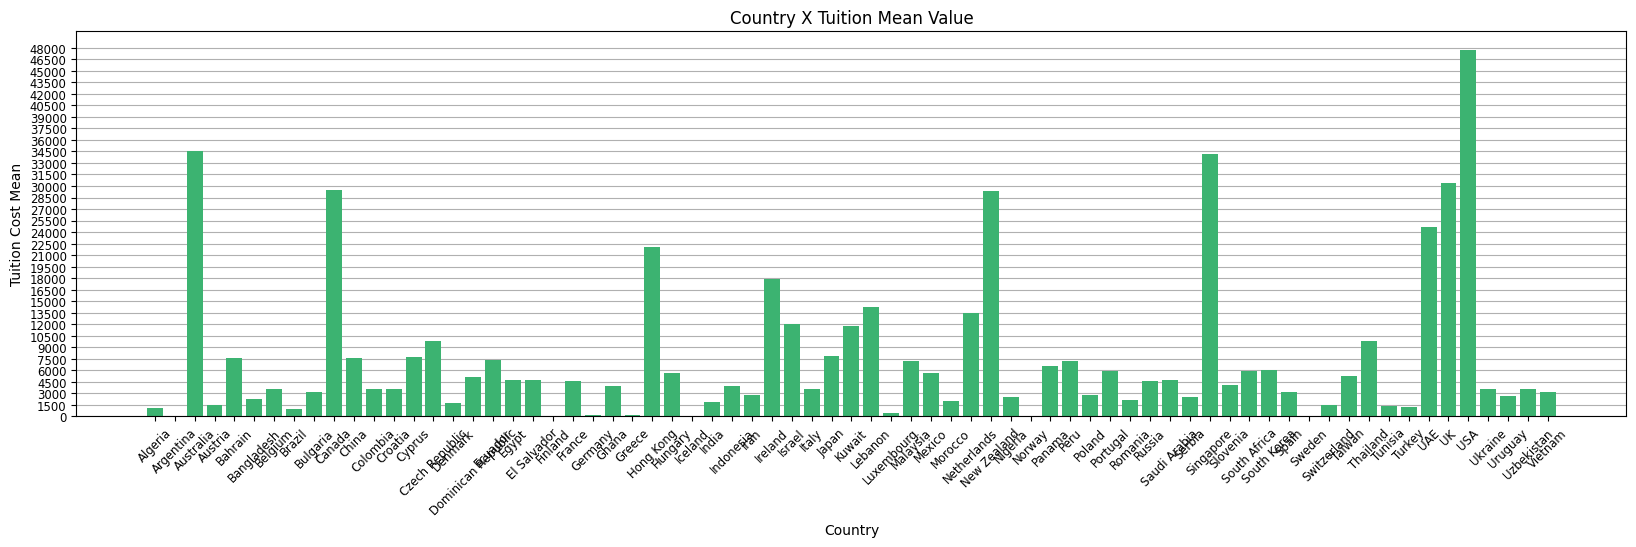

In [44]:
# Values for axes x and y
x = dfByCountryTuition["Country"]
y = dfByCountryTuition["Tuition_USD"]

# Getting image to plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)

# Set titles
ax.set_title("Country X Tuition Mean Value")
ax.set_xlabel("Country")
ax.set_ylabel("Tuition Cost Mean")

# Set values to show on y axis
ytick = np.arange(dfByCountryTuition["Tuition_USD"].min(), dfByCountryTuition["Tuition_USD"].max()+1500, 1500)
ax.set_yticks(ytick)

# Change display configuration on axes
ax.tick_params("x", labelsize="small", rotation=45)
ax.tick_params("y", labelsize="small")

# Put grid
ax.grid(axis="y")
ax.set_axisbelow(True) # put grid behing chart

# Show chart
ax.bar(x, y, color="mediumseagreen")
plt.show()